Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных.

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [82]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [83]:
X = data.iloc[:,:-1]
y = data["affair"]


In [84]:
model = LogisticRegression()

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [86]:
model.fit(X_train, Y_train)

LogisticRegression()

In [87]:
y_pred = model.predict_proba(X_test)

In [108]:
def get_fpr_tpr(y_pred, Y_test):
    fpr=[]
    tpr=[]
    for thr in np.linspace(0,1,100):
        tp = 0 
        fp = 0 
        fn = 0 
        tn = 0 
        for predicted_prob, actual in zip( y_pred[:, 1], Y_test ):    
            if predicted_prob >= thr:
                predicted = 1
            else:
                predicted = 0
    
            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
    
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        fpr.append(fp/(fp + tn))
        tpr.append(tp/(tp+fn))
    return fpr,tpr

ROC plot

0.7450326897376602

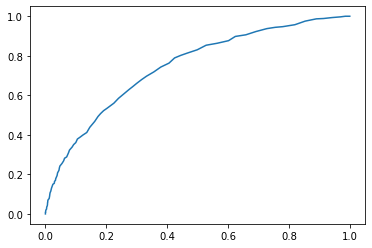

In [112]:
fpr,tpr = get_fpr_tpr(y_pred, Y_test)
plt.plot(fpr, tpr)
auc(fpr, tpr)

0.7451629176618145

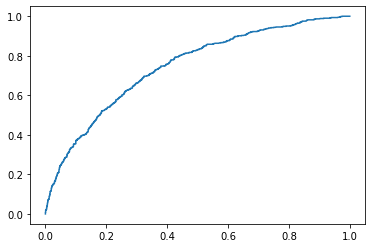

In [113]:
fpr, tpr, thres = roc_curve( Y_test, y_pred[:, 1])
plt.plot( fpr, tpr )
auc(fpr, tpr)

Precision - Recall  plot

In [114]:
pr, re, thres = precision_recall_curve( Y_test, y_pred[:, 1] )

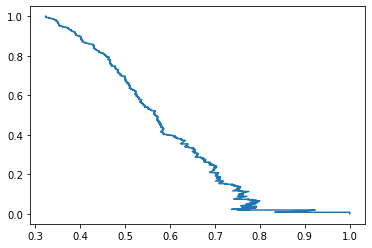

In [115]:
plt.plot(pr,re)